In [2]:
import pandas as pd
import datapackage
from pathlib import Path
import matplotlib.pyplot as plt

spotify_top_load = Path("universal_top_spotify_songs.csv")

# Read Universal_Top_Spotify_songs.csv
spotify_top = pd.read_csv(spotify_top_load)

# Import List of country codes
data_url = 'https://datahub.io/core/country-list/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)


                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]
                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]


In [3]:
data = data.rename(columns={"Code":"country"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     249 non-null    object
 1   country  248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [4]:
spotify_top_complete = pd.merge(data,spotify_top, on="country")
spotify_top_complete.head()

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Argentina,AR,0Me3GyNuLOa1YTIxhJPyCn,ASI ES LA VIDA,"Enrique Iglesias, Maria Becerra",50,0,0,2023-10-24,81,...,3,-3.513,0,0.0556,0.6880,0.000002,0.1070,0.963,128.044,4
1,Argentina,AR,5FWQLEX0lavdxiWGBNkBQ4,Me Enteré,"Tiago PZK, TINI",49,0,1,2023-10-24,81,...,8,-3.814,1,0.1080,0.1210,0.000001,0.3140,0.612,140.978,3
2,Argentina,AR,4zYHsmc2V9RyR8eOA0mlx6,Penas de Antaño,"Bizarrap, Milo j",48,0,2,2023-10-24,83,...,7,-6.296,1,0.0933,0.6880,0.000104,0.2710,0.368,140.051,4
3,Argentina,AR,7BVMtLpd7edHeOizt4RWz9,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",47,0,3,2023-10-24,79,...,6,-4.515,1,0.0309,0.3650,0.000000,0.1120,0.393,149.918,4
4,Argentina,AR,7w7BrPbOjF5OxChs2dxFve,En La Intimidad | CROSSOVER #1,"Big One, Emilia, Callejero Fino",46,0,4,2023-10-24,81,...,1,-4.991,1,0.1070,0.0924,0.000000,0.0699,0.640,89.946,4


In [5]:
spotify_top.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3LmvfNUQtglbTrydsdIqFU,We Belong Together,Mariah Carey,50,0,0,ZA,2023-10-24,73,False,...,0,-7.890,1,0.0601,0.0339,0.000000,0.090,0.762,139.986,4
1,0JXXNGljqupsJaZsgSbMZV,Sure Thing,Miguel,49,0,1,ZA,2023-10-24,90,False,...,11,-8.127,0,0.1000,0.0267,0.000307,0.191,0.498,81.001,4
2,6HmiaxYKrzq3sU2M0eFDg2,BETTER NOW,A-Reece,48,0,2,ZA,2023-10-24,50,True,...,1,-7.524,1,0.1660,0.1300,0.000031,0.121,0.725,83.001,4
3,4rXLjWdF2ZZpXCVTfWcshS,fukumean,Gunna,47,0,3,ZA,2023-10-24,96,True,...,1,-6.747,0,0.0903,0.1190,0.000000,0.285,0.220,130.001,4
4,4iZ4pt7kvcaH6Yo8UoZ4s2,Snooze,SZA,46,0,4,ZA,2023-10-24,92,True,...,5,-7.231,1,0.1320,0.1410,0.000000,0.110,0.392,143.008,4


In [6]:
spotify_top.shape

(25473, 25)

In [7]:
#spotify_top_complete_v1 = spotify_top_complete[spotify_top_complete['country'].notna()]
spotify_top_complete_v1 = spotify_top_complete.dropna(subset=['country','name'])
spotify_top_complete_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25122 entries, 0 to 25472
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                25122 non-null  object 
 1   country             25122 non-null  object 
 2   spotify_id          25122 non-null  object 
 3   name                25122 non-null  object 
 4   artists             25122 non-null  object 
 5   daily_rank          25122 non-null  int64  
 6   daily_movement      25122 non-null  int64  
 7   weekly_movement     25122 non-null  int64  
 8   snapshot_date       25122 non-null  object 
 9   popularity          25122 non-null  int64  
 10  is_explicit         25122 non-null  bool   
 11  duration_ms         25122 non-null  int64  
 12  album_name          25122 non-null  object 
 13  album_release_date  25122 non-null  object 
 14  danceability        25122 non-null  float64
 15  energy              25122 non-null  float64
 16  key      

In [8]:
spotify_top_complete_v2 = spotify_top_complete_v1.loc[spotify_top_complete_v1['snapshot_date'] == '2023-10-24']
spotify_top_complete_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 25172
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3577 non-null   object 
 1   country             3577 non-null   object 
 2   spotify_id          3577 non-null   object 
 3   name                3577 non-null   object 
 4   artists             3577 non-null   object 
 5   daily_rank          3577 non-null   int64  
 6   daily_movement      3577 non-null   int64  
 7   weekly_movement     3577 non-null   int64  
 8   snapshot_date       3577 non-null   object 
 9   popularity          3577 non-null   int64  
 10  is_explicit         3577 non-null   bool   
 11  duration_ms         3577 non-null   int64  
 12  album_name          3577 non-null   object 
 13  album_release_date  3577 non-null   object 
 14  danceability        3577 non-null   float64
 15  energy              3577 non-null   float64
 16  key       

In [9]:

countries = ['MX','US']
spotify_top_complete_v3 =  spotify_top_complete_v2[spotify_top_complete_v2['country'].isin(countries)]
spotify_top_complete_v3
                                

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
13923,Mexico,MX,1AZbs0L3SkXe625DKp37KQ,Julietota,LATIN MAFIA,50,0,0,2023-10-24,85,...,5,-3.262,0,0.1990,0.2830,0.000126,0.0972,0.302,82.944,4
13924,Mexico,MX,4qSEvFGCpde73gqIuq3sho,HIBIKI,"Bad Bunny, Mora",49,0,1,2023-10-24,91,...,6,-5.605,0,0.0706,0.6040,0.000000,0.1180,0.528,119.935,4
13925,Mexico,MX,3NhstUmrlhaN1M6hP8zMbb,BABY NUEVA,Bad Bunny,48,0,2,2023-10-24,89,...,10,-4.816,0,0.0616,0.5040,0.000505,0.3280,0.359,117.924,4
13926,Mexico,MX,179TZwPk0txEvjkraVTVKo,El Precio De La Soledad,Alfredo Olivas,47,0,3,2023-10-24,82,...,10,-3.665,1,0.1800,0.1290,0.000003,0.0840,0.909,95.426,4
13927,Mexico,MX,6XSqqQIy7Lm7SnwxS4NrGx,Classy 101,"Feid, Young Miko",46,0,4,2023-10-24,93,...,11,-4.790,1,0.1590,0.1450,0.000000,0.1200,0.672,100.065,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,2023-10-24,94,...,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,2023-10-24,95,...,4,-5.009,0,0.0680,0.1500,0.000402,0.5800,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,2023-10-24,88,...,2,-7.683,0,0.1940,0.2550,0.000004,0.1120,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,2023-10-24,100,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4


In [10]:
spotify_top_complete_v2['Name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bolivia, Plurinational State of', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan, Province of China', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'U

In [11]:
countries2 = ['Korea, Republic of' , 'Taiwan, Province of China' , 'Singapore','Mexico' , 'Colombia' , 'Chile','France', 'United Kingdom' ,  'Romania','United States' , 'Canada']
Asia =  ['Korea, Republic of' , 'Taiwan, Province of China' , 'Singapore']
LatinAmerica = ['Mexico' , 'Colombia' , 'Chile']
Europe = ['France', 'United Kingdom' ,  'Romania']
NorthAmerica = ['United States' , 'Canada']

In [12]:
spotify_top_complete_v4 =  spotify_top_complete_v2[spotify_top_complete_v2['Name'].isin(countries2)]
spotify_top_complete_v4


,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2800,Canada,CA,0PAcdVzhPO4gq1Iym9ESnK,Thinkin’ Bout Me,Morgan Wallen,50,0,0,2023-10-24,86,...,3,-5.775,0,0.0308,0.492000,0.000000,0.117,0.429,139.971,4
2801,Canada,CA,67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),"Travis Scott, Drake",49,0,1,2023-10-24,91,...,7,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,4
2802,Canada,CA,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,48,0,2,2023-10-24,93,...,10,-2.810,1,0.0336,0.049500,0.017700,0.101,0.398,124.053,4
2803,Canada,CA,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",47,0,3,2023-10-24,90,...,0,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,165.921,4
2804,Canada,CA,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,46,0,4,2023-10-24,92,...,7,-7.582,1,0.0919,0.492000,0.000016,0.118,0.453,68.534,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,2023-10-24,94,...,0,-7.746,1,0.0459,0.554000,0.000002,0.102,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,2023-10-24,95,...,4,-5.009,0,0.0680,0.150000,0.000402,0.580,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,2023-10-24,88,...,2,-7.683,0,0.1940,0.255000,0.000004,0.112,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,2023-10-24,100,...,9,-5.707,1,0.1570,0.117000,0.000021,0.105,0.564,169.994,4


In [13]:
# Define a dictionary to map countries to regions
country_to_region = {
    'KR': 'ASIA',
    'TW': 'ASIA',
    'SG': 'ASIA',
    'MX': 'LATAM',
    'CO': 'LATAM',
    'CL': 'LATAM',
    'FR': 'EURO',
    'GB': 'EURO',
    'RO': 'EURO',
    'US': 'NAM',
    'CA': 'NAM'
}

# Add the "region" column based on the mapping
spotify_top_complete_v4['region'] = spotify_top_complete_v2['country'].map(country_to_region)
spotify_top_complete_v4


C:\Users\OMEN\AppData\Local\Temp\ipykernel_2448\1553028961.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_top_complete_v4['region'] = spotify_top_complete_v2['country'].map(country_to_region)


,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,region
2800,Canada,CA,0PAcdVzhPO4gq1Iym9ESnK,Thinkin’ Bout Me,Morgan Wallen,50,0,0,2023-10-24,86,...,-5.775,0,0.0308,0.492000,0.000000,0.117,0.429,139.971,4,NAM
2801,Canada,CA,67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),"Travis Scott, Drake",49,0,1,2023-10-24,91,...,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,4,NAM
2802,Canada,CA,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,48,0,2,2023-10-24,93,...,-2.810,1,0.0336,0.049500,0.017700,0.101,0.398,124.053,4,NAM
2803,Canada,CA,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",47,0,3,2023-10-24,90,...,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,165.921,4,NAM
2804,Canada,CA,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,46,0,4,2023-10-24,92,...,-7.582,1,0.0919,0.492000,0.000016,0.118,0.453,68.534,4,NAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,2023-10-24,94,...,-7.746,1,0.0459,0.554000,0.000002,0.102,0.155,77.639,4,NAM
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,2023-10-24,95,...,-5.009,0,0.0680,0.150000,0.000402,0.580,0.130,139.056,4,NAM
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,2023-10-24,88,...,-7.683,0,0.1940,0.255000,0.000004,0.112,0.726,99.974,4,NAM
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,2023-10-24,100,...,-5.707,1,0.1570,0.117000,0.000021,0.105,0.564,169.994,4,NAM


In [14]:
#Since explicitness is a boolean value the dataframe is filtered by the column explicitness looking for true values
explicitness = spotify_top_complete_v4.is_explicit.value_counts().loc[True]
explicitness_total = spotify_top_complete_v4.is_explicit.value_counts() #Total number of songs
explicitness



233

In [15]:
# Sum of explicit songs by region using the region ditionary merged with the clean dataframe
explicitness_region = spotify_top_complete_v4.groupby(['region'])['is_explicit'].sum()
region_count = spotify_top_complete_v4.groupby(['region'])['region'].count() #Total number of songs per region
percentage_region = explicitness_region/region_count*100 # Proportion of explicit songs (explicitness= True) divided by the total songs per region
percentage_region.to_frame().rename(columns={0:"explicit_top50"}).reset_index() # Creation of explicitness per region dataframe


,region,explicit_top50
0,ASIA,13.333333
1,EURO,46.000000
2,LATAM,63.333333
3,NAM,49.000000


In [16]:
# Top10 filters only the top ten songs by country and then does the same explicitness procedure for the top ten
top_10 = spotify_top_complete_v4[spotify_top_complete_v4['daily_rank']<=10]
explicitness_region10 = top_10.groupby(['region'])['is_explicit'].sum()
region_count10 = top_10.groupby(['region'])['region'].count()
percentage_region2 = explicitness_region10/region_count10*100
percentage_region2.to_frame().rename(columns={0:"explicit_top10"}).reset_index()

,region,explicit_top10
0,ASIA,36.666667
1,EURO,60.000000
2,LATAM,83.333333
3,NAM,65.000000


Text(0, 0.5, 'Count of explicit songs in top charts (%)')

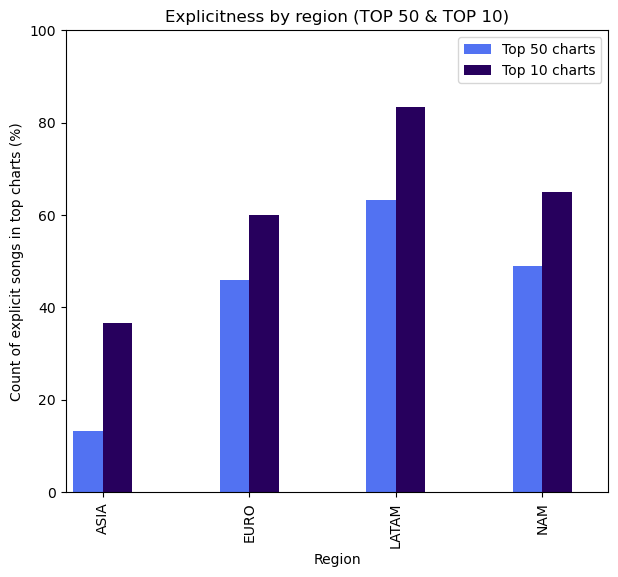

In [17]:
# Charting the explicitness per region for both top 10 and top 50 songs using pandas method
plt.figure(figsize=(7,6))
percentage_region.plot(kind='bar',x='region',y='explicit_top50', width=0.2, color = '#5272F2', position = 1,)
percentage_region2.plot(kind='bar',x='region',y='explicit_top10', width=0.2, color = '#27005D', position = 0)
plt.title('Explicitness by region (TOP 50 & TOP 10)')
plt.ylim((0,100))
plt.legend(["Top 50 charts","Top 10 charts"])
plt.xlabel('Region')
plt.ylabel('Count of explicit songs in top charts (%)')


Text(0, 0.5, 'Count of explicit songs in top 50 charts (%)')

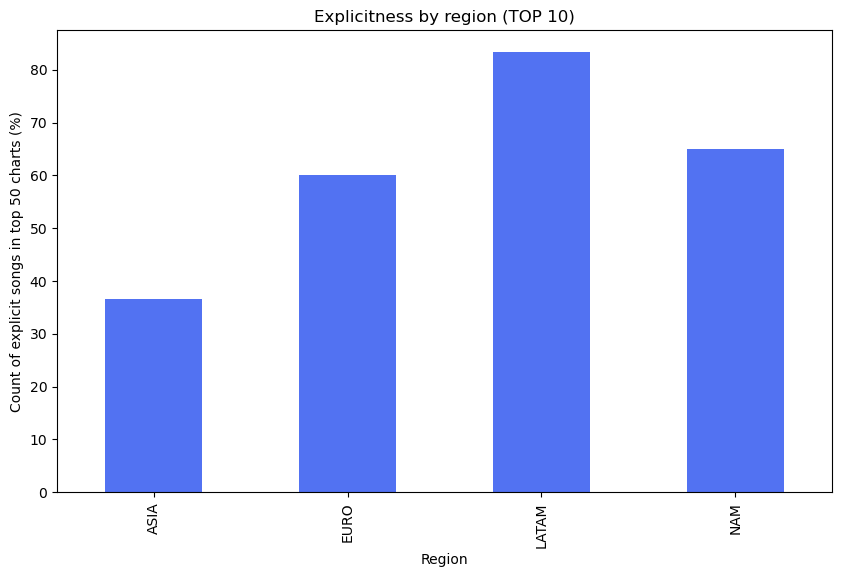

In [18]:
# Chart for the top 10 only
plt.figure(figsize=(10,6))
percentage_region2.plot(kind='bar',x='region',y='explicit_top10', color = '#5272F2')
plt.title('Explicitness by region (TOP 10)')
plt.xlabel('Region')
plt.ylabel('Count of explicit songs in top 50 charts (%)')

In [19]:
#Explicitness grouped for the countries of our selection, of the top 50 songs
explicitness_country= spotify_top_complete_v4.groupby(['Name'])['is_explicit'].sum() # Grouping by country and filtering the explicit songs
country_count = spotify_top_complete_v4.groupby(['Name'])['Name'].count() # Total number of songs per country
percentage_country = explicitness_country/country_count*100 # Proportion of explicit songs
percentage_country.to_frame().rename(columns={0:"explicit_top50"}).reset_index() # Convert to dataframe

,Name,explicit_top50
0,Canada,46.0
1,Chile,66.0
2,Colombia,68.0
3,France,66.0
4,"Korea, Republic of",12.0
5,Mexico,56.0
6,Romania,36.0
7,Singapore,18.0
8,"Taiwan, Province of China",10.0
9,United Kingdom,36.0


In [20]:
# Explicitness grouped for the countries of our selection, of the top 10 songs
explicitness_country10 = top_10.groupby(['Name'])['is_explicit'].sum() # Using the previously created dataframe of the top 10 songs the explicitness is filtered
country_count10 = top_10.groupby(['Name'])['Name'].count()
percentage_country2 = explicitness_country10/country_count10*100
percentage_country2.to_frame().rename(columns={0:"explicit_top10"}).reset_index()

,Name,explicit_top10
0,Canada,60.0
1,Chile,70.0
2,Colombia,90.0
3,France,70.0
4,"Korea, Republic of",40.0
5,Mexico,90.0
6,Romania,60.0
7,Singapore,50.0
8,"Taiwan, Province of China",20.0
9,United Kingdom,50.0


Text(0, 0.5, 'Count of explicit songs in top charts (%)')

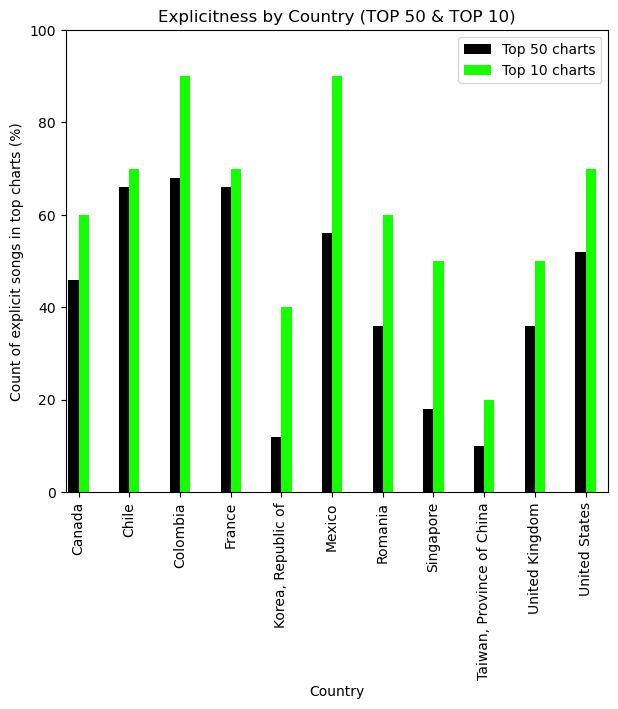

In [25]:
# Plotting the proportion of explicitness in the top 10 and 50 for each country of our selection.
plt.figure(figsize=(7,6))
percentage_country.plot(kind='bar',x='Name',y='explicit_top50', width=0.2, color = '#000000', position = 1,)
percentage_country2.plot(kind='bar',x='Name',y='explicit_top10', width=0.2, color = '#16FF00', position = 0)
plt.title('Explicitness by Country (TOP 50 & TOP 10)')
plt.ylim((0,100))
plt.legend(["Top 50 charts","Top 10 charts"])
plt.xlabel('Country')
plt.ylabel('Count of explicit songs in top charts (%)')

In [22]:
from scipy.stats import linregress

Text(0.5, 1.0, 'Danceability v Energy')

<Figure size 700x600 with 0 Axes>

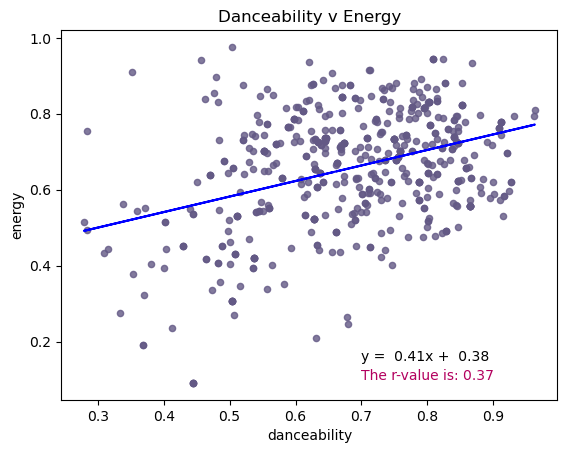

In [23]:
# Linear regression for Danceability and energy 
plt.figure(figsize=(7,6))
x_values = spotify_top_complete_v4['danceability'] #Filter danceability and set as x values
y_values = spotify_top_complete_v4['energy'] # Filter energy and set as y values
(b1,b0,rvalue,pvalue,stderr) = linregress(x_values,y_values) #Linear regression
regress_values = b0 + b1*x_values # Linear equation for the variables
line_eq = "y =  " + str(round(b1,2)) + "x +  "  + str(round(b0, 2)) # Display
spotify_top_complete_v4.plot(kind = 'scatter',x = 'danceability', y = 'energy',color = '#635985',alpha=0.8) # Pandas plot
plt.plot(x_values,regress_values, color='b')
plt.annotate(line_eq,(0.7,.15), fontsize=10, color="#000000")
plt.text(0.7,.1,f'The r-value is: {round(rvalue,2)}',color= '#B3005E')
plt.title('Danceability v Energy')